In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

current_path = os.path.dirname(os.path.abspath('__file__'))
root_path = os.path.dirname(current_path)
sys.path.append(root_path)

from IPython.display import display
import numpy as np
from PIL import Image

# lib
from src.dataset import DocumentDataset
from src.utils import draw_boxes

# nn
import torch
from transformers import LayoutLMTokenizer


/home/anip/miniconda3/envs/sds/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Config

In [2]:
data_path = os.path.join(root_path, 'data')

# load the dataset
dataset = DocumentDataset(data_path=data_path)

tokenizer = LayoutLMTokenizer.from_pretrained("microsoft/layoutlm-base-uncased")

## Visualize a few documents

label: 1


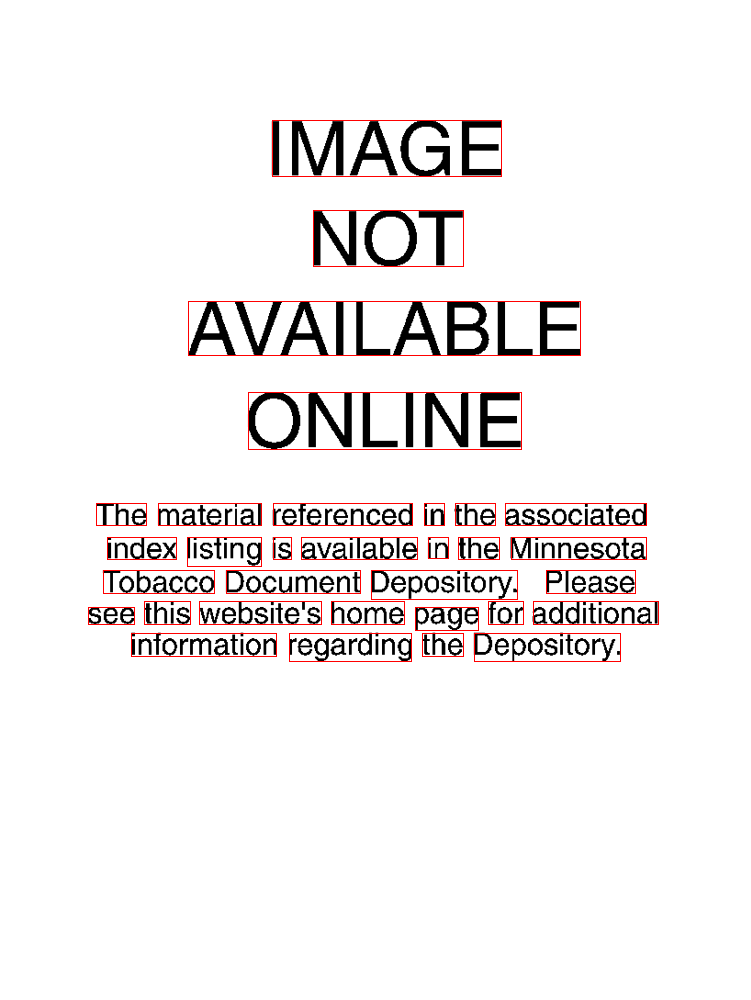

label: 2


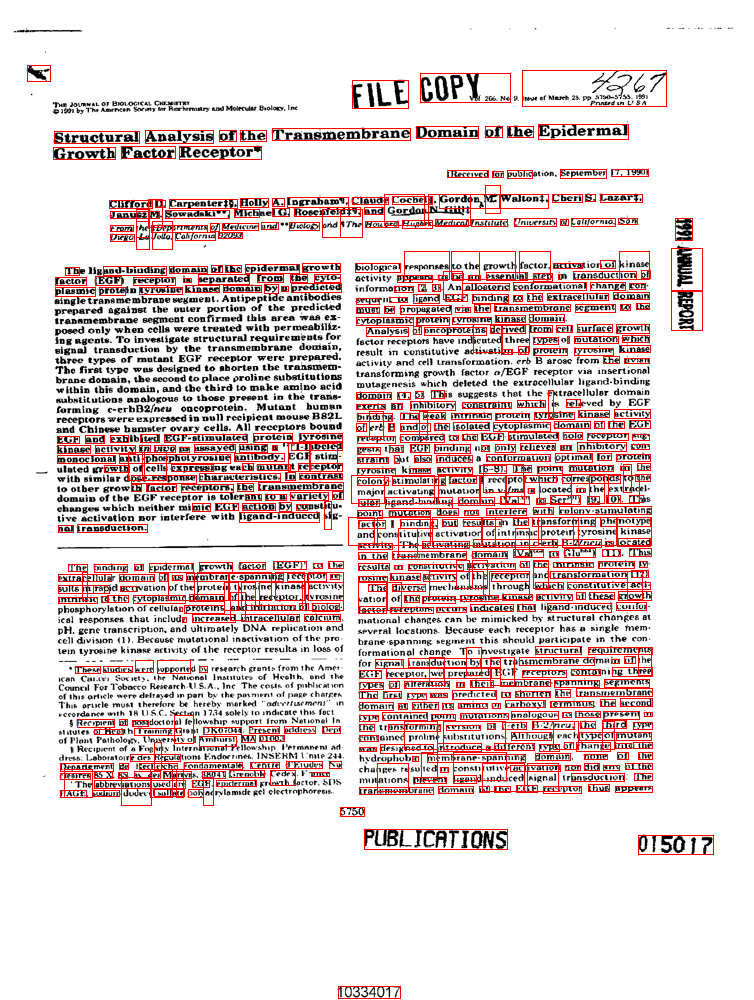

label: 2


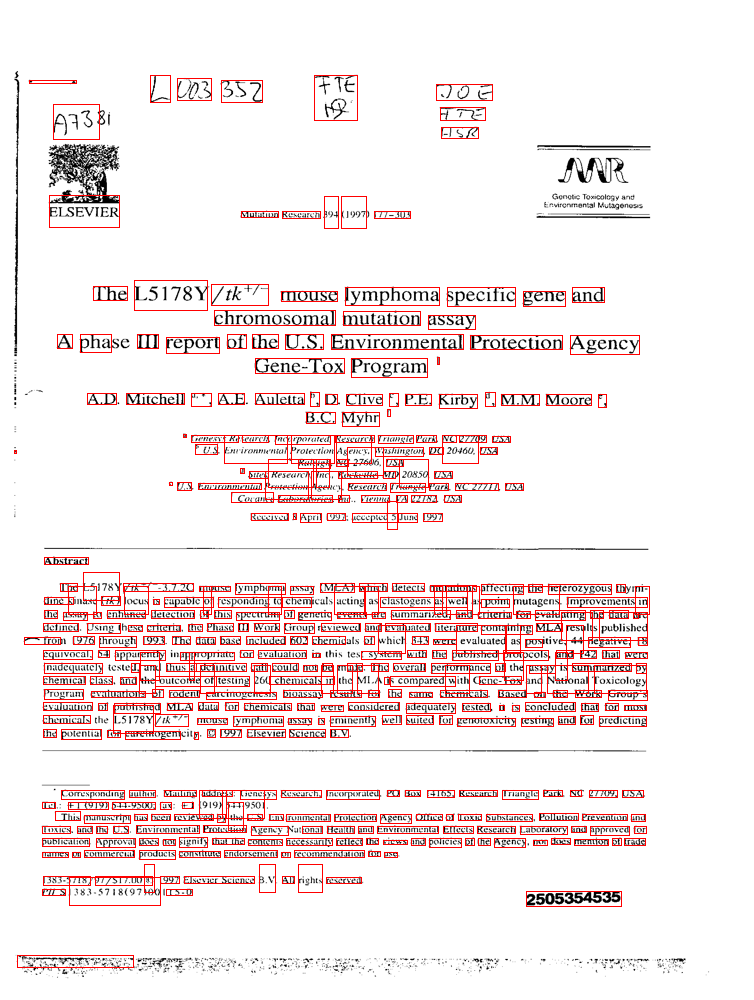

label: 2


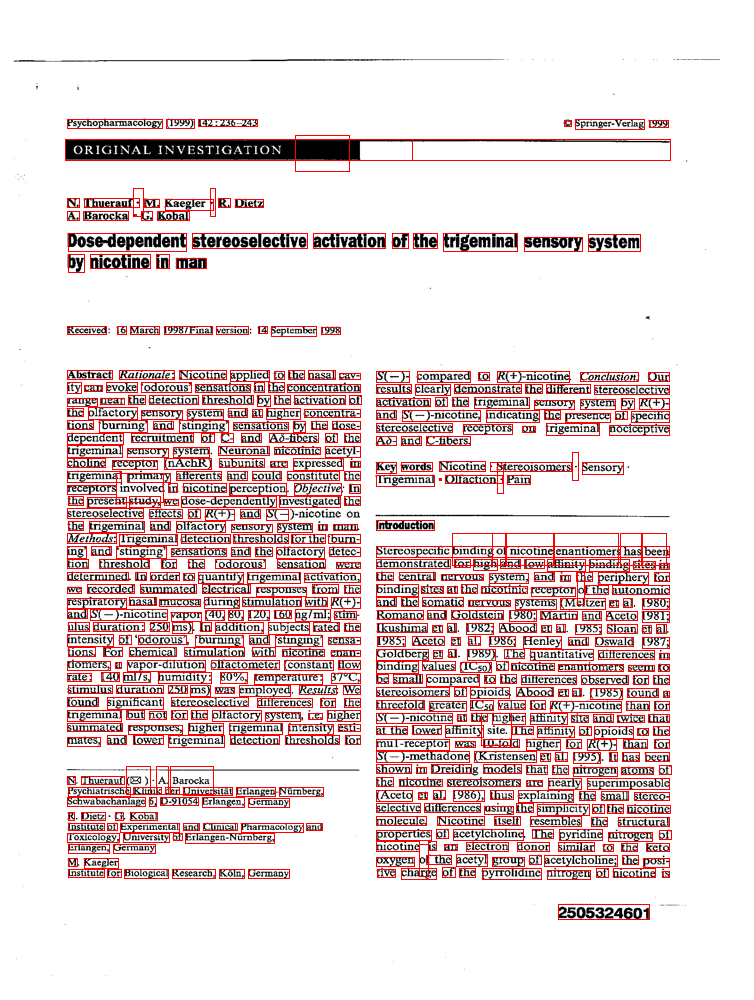

label: 3


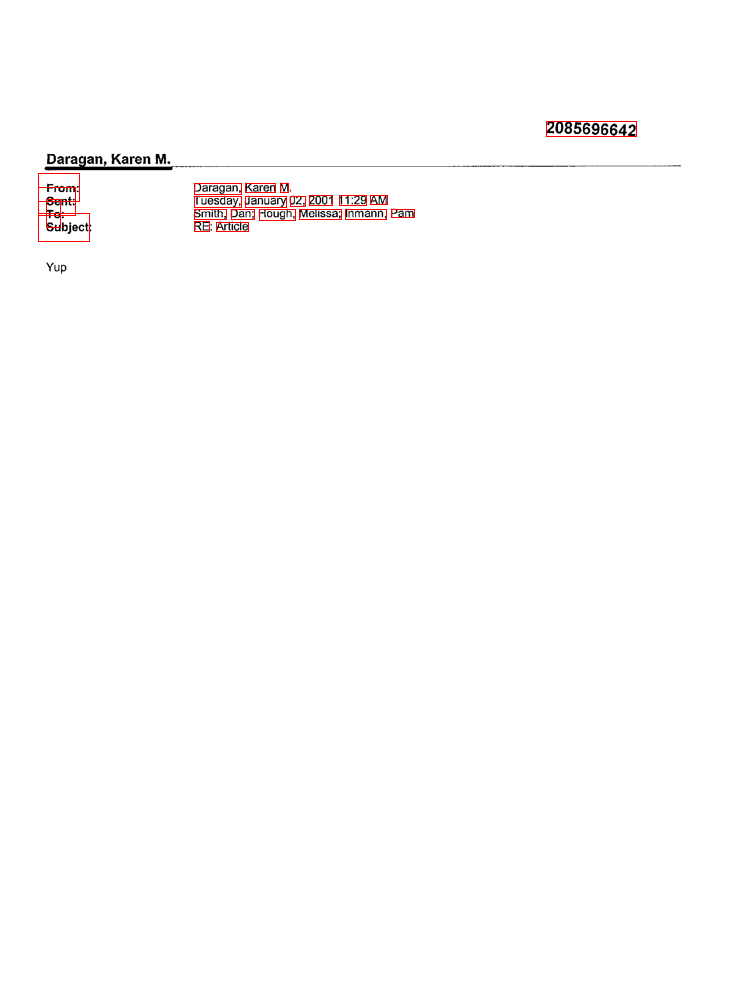

In [3]:
# visualize a few samples
num_samples = 5
np.random.seed(42)
for _ in range(num_samples):
    test_index = np.random.randint(0, len(dataset))
    sample = dataset[test_index]
    file_name, image_path, label = sample['file_name'], sample['image_path'], sample['label']
    words, nboxes, aboxes = sample['words'], sample['nboxes'], sample['aboxes']
    image = draw_boxes(Image.open(image_path), aboxes)
    print(f"label: {label}")
    display(image)